

Eigen Values of Iris-setosa  class are
 [0.2385196508385491, 0.03625951592005704] 

Eigen Vectors of class  Iris-setosa  are
[0.6662063004569766, 0.6059248116613081]
[0.7363593077760278, -0.6196146441116607]
[0.09478706307463393, 0.4916342848954269]
[0.07042405666193358, 0.0850208523301829]


Eigen Values of Iris-versicolor  class are
 [0.487873944139436, 0.0723840958429557] 

Eigen Vectors of class  Iris-versicolor  are
[0.6867237581833204, 0.1022795963712644]
[0.6236631193015096, -0.31596679038241526]
[0.21498368850463861, 0.9150408651036839]
[0.3053470275712991, -0.22891938915668064]


Eigen Values of Iris-virginica  class are
 [0.6952548382254046, 0.10655122594260881] 

Eigen Vectors of class  Iris-virginica  are
[0.7410167888505457, 0.16525895211851346]
[0.20328771648736274, -0.7486427949427167]
[0.6278917850352554, 0.1694277619248421]
[0.12377450970300792, -0.6192880410715091]


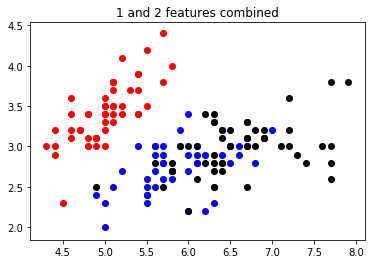

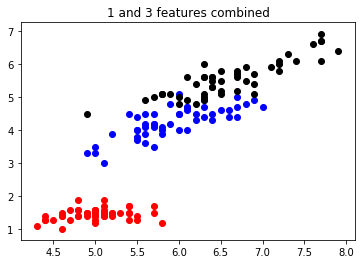

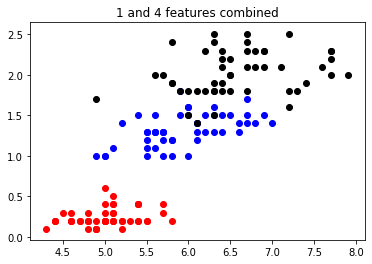

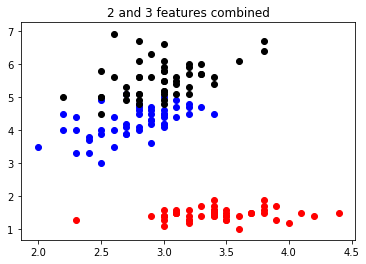

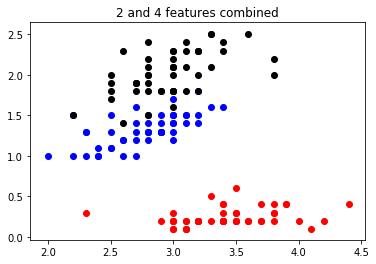

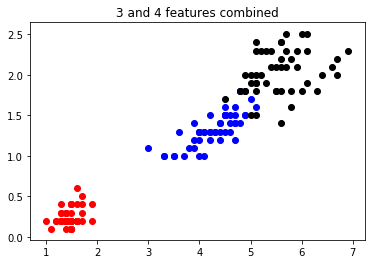

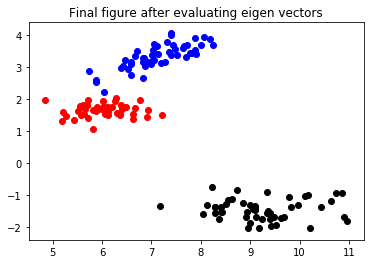

In [7]:
import csv
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
def covariance(sep_data,mean1):
    cov={}
    for key in sep_data:
        cov[key]=[]
        for j in range(len(sep_data[key][0])):
            new_lst=[]
            for k in range(len(sep_data[key][0])):
                s=0
                for i in range(len(sep_data[key])):
                    s+=(sep_data[key][i][j]-mean1[key][j])*(sep_data[key][i][k]-mean1[key][k])
                new_lst.append(s/(len(sep_data[key])-1))
            cov[key].append(new_lst)
    return (cov)
def normalize(data_sep):
    minimum=dict()
    maximum=dict()
    normal=dict()
    for key in data_sep:
        maximum[key]=[0,0,0,0]
        minimum[key]=[100,100,100,100]
        for j in range(len(data_sep[key][0])):
            for k in range(len(data_sep[key])):
                numb=data_sep[key][k][j]
                if maximum[key][j]<=numb:
                    maximum[key][j]=numb
                if minimum[key][j]>numb:
                    minimum[key][j]=numb
        normal[key]=[]
        for j in range(len(data_sep[key])):
            newlist2=[]
            for k in range(len(data_sep[key][0])):
                newlist2.append((data_sep[key][j][k]-minimum[key][k])/(maximum[key][k]-minimum[key][k]))
            normal[key].append(newlist2)
    return(normal)
def class_separation(data):
    #SEPARATION OF CLASS OF THE DATA PROVIDED
    separated=dict()
    for i in range (len(data)):
        row=data[i]
        class_row=row[-1]
        if (class_row not in separated):
            separated[class_row]=list()
        separated[class_row].append(row)
    return(separated)
def nishan():
    data=[]
    raw_Data=[]
    feature={}
    mean1={}
    cov={}
    eigen_val={}
    eigen_vec={}
    Y={}
    keys=[]
    A1={}
    A2={}
    B1={}
    B2={}
    with open('iris.csv', newline='') as f:
        reader = csv.reader(f)
        raw_data = list(reader)
    for i in range(len(raw_data)):
        new_lst=[]
        for j in range(len(raw_data[0])):
            if j==len(raw_data[0])-1:
                new_lst.append(raw_data[i][j])
            else:
                new_lst.append(float(raw_data[i][j]))
        data.append(new_lst)
    #print(data)
    post_separate=class_separation(data)
    sep_data=dict()
    #test_data=[[5.1, 2.5, 3.2, 4.3],[4.9, 3, 1.4, 0.2],[6, 3, 4.8, 1.8]]
    for key in post_separate:
        sep_data[key]=[]
        for i in range(len(post_separate[key])):
            newlist=[]
            for j in range(len(post_separate[key][0])-1):
                newlist.append(post_separate[key][i][j])
            sep_data[key].append(newlist)
    normalized=normalize(sep_data)
    for key in sep_data:
        feature[key]=[]
        for j in range(len(sep_data[key][0])):
            new_lst=[]
            for i in range(len(sep_data[key])):
                new_lst.append(sep_data[key][i][j])
            feature[key].append(new_lst)
    for key in feature:
        mean1[key]=[]
        for i in range(len(feature[key])):
            mean1[key].append(mean(feature[key][i]))
    cov=covariance(sep_data,mean1)
    #print(cov)
    for key in cov:
        eigen_val[key]=[]
        eigen_vec[key]=[]
        val=np.empty([len(cov[key][0]),1])
        vec=np.empty([len(cov[key][0]),len(cov[key][0])])
        cov_np=np.empty([len(cov[key][0]),len(cov[key][0])])
        for k in range(len(cov[key])):
            for m in range(len(cov[key][0])):
                cov_np[k,m]=cov[key][k][m]
        val,vec=np.linalg.eig(cov_np)
        for k in range(len(cov[key])):
            eigen_val[key].append(val[k])
            new_lst=[]
            for m in range(len(cov[key][0])):
                new_lst.append(vec[k,m])
            eigen_vec[key].append(new_lst)
    for key in eigen_val:
        for i in range(len(eigen_val[key])):
            for j in range(len(eigen_val[key])-i-1):
                if eigen_val[key][j]<eigen_val[key][j+1]:
                    eigen_val[key][j],eigen_val[key][j+1]=eigen_val[key][j+1],eigen_val[key][j]
                    eigen_vec[key][j],eigen_vec[key][j+1]=eigen_vec[key][j+1],eigen_vec[key][j]
    for key in eigen_val:
        del eigen_val[key][-1]
        del eigen_val[key][-1]
        print("\n\nEigen Values of",key," class are\n",eigen_val[key],"\n\nEigen Vectors of class ",key," are")
        for i in range(len(eigen_vec[key])):
            del eigen_vec[key][i][-1]
            del eigen_vec[key][i][-1]
            print(eigen_vec[key][i])
    for key in sep_data:
        X=np.array(sep_data[key])
        P=np.array(eigen_vec[key])
        Y_np=np.matmul(X,P)
        Y[key]=Y_np.tolist()
    #print(Y)
    k=1
    for key in Y:
        keys.append(key)
    for key in Y:
        A1[key]=[]
        A2[key]=[]
        for i in range(len(Y[key])):
            A1[key].append(Y[key][i][0])
            A2[key].append(Y[key][i][1])
    for i in range(len(sep_data[keys[0]][0])-1):
        for j in range(i+1,len(sep_data[keys[0]][0])):
            lb=str(i+1)+" and "+str(j+1)+" features combined"
            plot2=plt.figure(k)
            plt.scatter(feature[keys[0]][i],feature[keys[0]][j],c='r')
            plt.title(lb)
            plt.scatter(feature[keys[1]][i],feature[keys[1]][j],c='b')
            plt.scatter(feature[keys[2]][i],feature[keys[2]][j],c='k')
            k+=1
    #print(feature)
    plot2=plt.figure(k)
    plt.title("Final figure after evaluating eigen vectors")
    plt.scatter(A1[keys[0]], A2[keys[0]], c='r')
    plt.scatter(A1[keys[1]], A2[keys[1]], c='b')
    plt.scatter(A1[keys[2]], A2[keys[2]], c='k')
    plt.show()
nishan()